In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, roc_auc_score

# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](./spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [3]:
dataset = pd.read_csv("dataset/spambase.csv") # cargando los datos desde un CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


# PUNTO1: ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [51]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

# Eliminación de columna de spam
column_sum = column_sum.drop(columns=["spam"])

# Suma de palabras mas usadas en correos no spam
nospam_sum_column = column_sum.loc[0].sort_values(ascending=False)

# Suma de palabras mas usadas en correos spam
spam_sum_column = column_sum.loc[1].sort_values(ascending=False)

1.1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM?

In [56]:
# Seleccionamos las columnas de las palabras mas usadas en correos spam y no spam
ten_words_more_used_nospam = nospam_sum_column.head(10)
ten_words_more_used_spam = spam_sum_column.head(10)

print (f"-> Las 10 palabras mas usadas en correos no spam son:\n{ten_words_more_used_nospam}\n")
print (f"-> Las 10 palabras mas usadas en correos spam son:\n{ten_words_more_used_spam}")

-> Las 10 palabras mas usadas en correos no spam son:
word_freq_you        3541702
word_freq_george     3527559
word_freq_hp         2496576
word_freq_will       1495268
word_freq_your       1223098
word_freq_hpl        1204398
word_freq_re         1159138
word_freq_edu         800669
word_freq_address     681569
word_freq_meeting     604460
Name: 0, dtype: int64

-> Las 10 palabras mas usadas en correos spam son:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
char_freq_!            931352
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
Name: 1, dtype: int64


1.2. ¿Hay palabras en común?

In [53]:
common_words = set(ten_words_more_used_nospam.index).intersection(set(ten_words_more_used_spam.index))
print (f"-> Las palabras en común entre correos spam y no spam son:\n{common_words}\n")

-> Las palabras en común entre correos spam y no spam son:
{'word_freq_you', 'word_freq_will', 'word_freq_your'}



1.3. ¿Algunas llaman la atención?

R/ Si, todas las palabras en común (You, Will, Your) llaman la atención

# PUNTO2: Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [61]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
y = dataset["spam"]

# Se separa el dataset en entrenamiento y evaluación
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

# PUNTO3: Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [62]:
# Crear una instancia del clasificador MultinomialNB
mnb = MultinomialNB()

# Entrenar el clasificador con el conjunto de entrenamiento
mnb.fit(X_train, y_train)

MultinomialNB()

# PUNTO4: Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [63]:
# Escalamos para aplicar en regresión logística
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Crear una instancia del clasificador LogisticRegression
lr = LogisticRegression(random_state = 0, class_weight="balanced")
lr.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=0)

# PUNTO5: Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

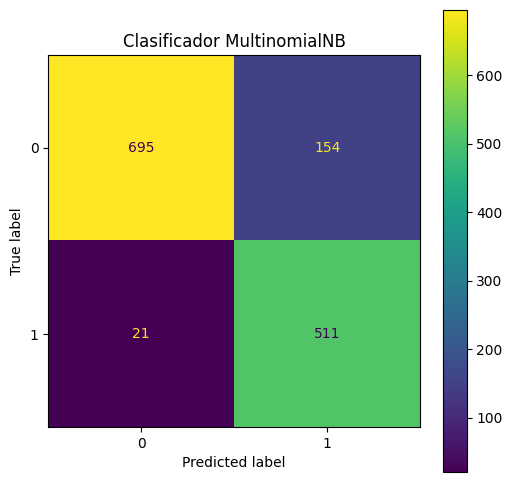

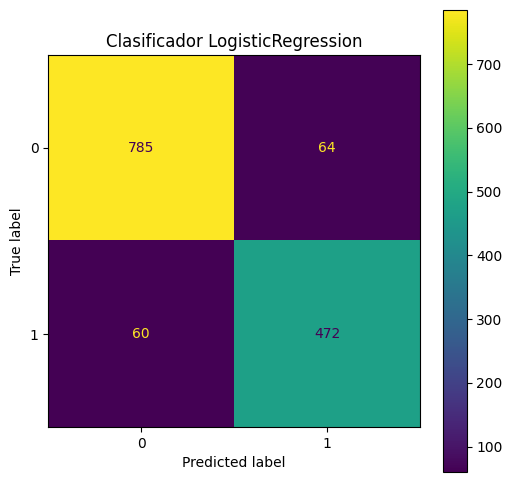

In [69]:
# Obtener las predicciones del modelo MultinomialNB
y_pred_mnb = mnb.predict(X_test)

# Obtener las predicciones del modelo LogisticRegression
y_pred_lr = lr.predict(X_test_scaled)

# Calcular la matriz de confusión para MultinomialNB
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# Calcular la matriz de confusión para LogisticRegression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Matriz de confusión para MultinomialNB
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb,
                              display_labels=mnb.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador MultinomialNB");


# Matriz de confusión para LogisticRegression
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador LogisticRegression");


5.1. ¿Qué tipo de error comete más cada modelo?

In [71]:
print ("El clasificador de bayes ingenuo comete mas errores de tipo I: 154")
print ("El clasificador de regresión logística comete mas errores de tipo I: 64")

El clasificador de bayes ingenuo comete mas errores de tipo I: 154
El clasificador de regresión logística comete mas errores de tipo I: 64


5.2. ¿Cuál de los dos tipos de error crees que es más importante para este problema?

R/ 

Errores de Tipo I y Tipo II en Detección de Spam:

- Error de Tipo I (Falso Positivo):

    - Un correo legítimo es clasificado como spam.
    - Consecuencia: El usuario podría perder correos importantes que fueron enviados a la carpeta de spam.
    
- Error de Tipo II (Falso Negativo):

    - Un correo spam es clasificado como legítimo.
    - Consecuencia: El usuario recibe correos no deseados en su bandeja de entrada, lo que puede ser molesto y potencialmente peligroso si contiene phishing o malware.

Respuesta:
Para el problema de detección de spam, los errores de tipo I (falsos positivos) son más importantes porque implican la pérdida de correos legítimos, lo cual puede tener consecuencias significativas para el usuario.

# PUNTO6: Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [70]:
# Calcular precisión y recuperación
print ("Precisión y recuperación para Bayes ingenuo")
precision_mnb = precision_score(y_test, y_pred_mnb, zero_division=0)
recall_mnb = recall_score(y_test, y_pred_mnb, zero_division=0)

print(f"Precisión: {precision_mnb}")
print(f"Recuperación: {recall_mnb}")

print ("Precisión y recuperación para Regresión logística")
precision_lr = precision_score(y_test, y_pred_lr, zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, zero_division=0)

print(f"Precisión: {precision_lr}")
print(f"Recuperación: {recall_lr}")

Precisión y recuperación para Bayes ingenuo
Precisión: 0.7684210526315789
Recuperación: 0.9605263157894737
Precisión y recuperación para Regresión logística
Precisión: 0.8805970149253731
Recuperación: 0.8872180451127819


6.1. Para cada métrica, ¿cuál es el mejor modelo?

In [72]:
mejor_modelo_precision = 'Bayes ingenuo' if precision_mnb > precision_lr else 'Regresión logística'
mejor_modelo_recuperacion = 'Bayes ingenuo' if recall_mnb > recall_lr else 'Regresión logística'

print(f'Mejor modelo en precisión: {mejor_modelo_precision}')
print(f'Mejor modelo en recuperación: {mejor_modelo_recuperacion}')

Mejor modelo en precisión: Regresión logística
Mejor modelo en recuperación: Bayes ingenuo


6.2. ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

R/

- Precisión: 
    La precisión mide la proporción de verdaderos positivos sobre el total de predicciones positivas. Una alta precisión significa pocos falsos positivos.
- Recuperación (Recall): 
    La recuperación mide la proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos. Una alta recuperación significa pocos falsos negativos.

Ambos modelos presentaron errores de tipo I (falsos positivos) en mayor proporción, sin embargo, el clasificador de bayes ingenuo tuvo un mayor numero de errores de este tipo, es por ello que su presición es menor comparado con la regresión logistica. 

# PUNTO7: Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

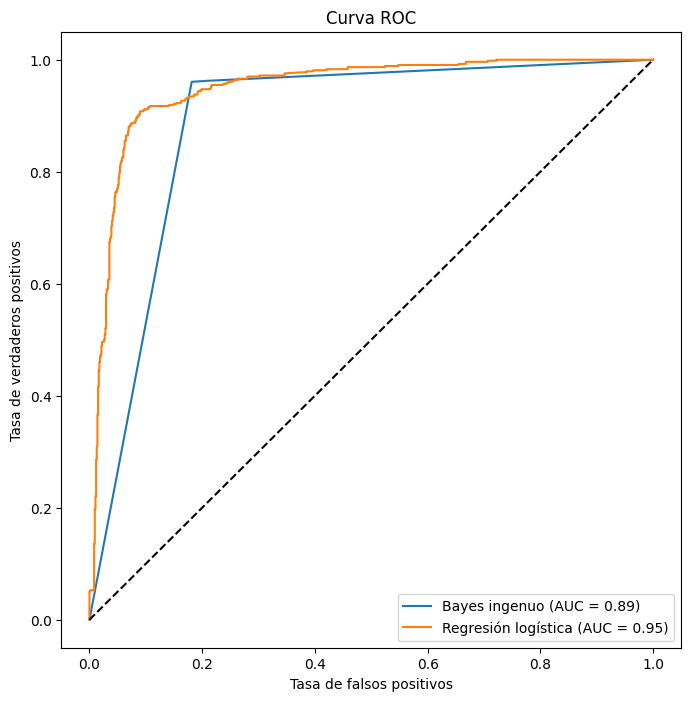

In [74]:
# Obtener las probabilidades de predicción
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Calcular el área bajo la curva ROC
roc_auc_mnb = roc_auc_score(y_test, y_prob_mnb)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_mnb, tpr_mnb, label=f"Bayes ingenuo (AUC = {roc_auc_mnb:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión logística (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()
